In [42]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau



# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [43]:
df=pd.read_csv('C:/Users/lenovo/Downloads/kalimati/dataset/Cauli_Local.csv')

In [44]:
df

,sn,name,price
0,1,Cauli Local,24.0
1,2,Cauli Local,27.0
2,3,Cauli Local,26.0
3,4,Cauli Local,24.0
4,5,Cauli Local,25.0
...,...,...,...
3606,3607,Cauli Local,30.0
3607,3608,Cauli Local,35.0
3608,3609,Cauli Local,35.0
3609,3610,Cauli Local,40.0


In [45]:
closedf = df[['sn','price']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3611, 2)


In [46]:
del closedf['sn']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(3611, 1)


In [47]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2527, 1)
test_data:  (1084, 1)


In [48]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2496, 30)
y_train:  (2496,)
X_test:  (1053, 30)
y_test (1053,)


In [49]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2496, 30, 1)
X_test:  (1053, 30, 1)


In [50]:
model=Sequential()

model.add(LSTM(128,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [51]:
#early stopping and model checking

#Early Stopping
earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,         #Abs value and is the main change required before we stop
                          mode='auto',
                          patience = 6,             #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped
#Model Checkpoint
checkpoint = ModelCheckpoint(monitor = "val_loss",
                             mode ='auto',
                             filepath = "./drive/MyDrive/StockPrice/best_model.h5",
                             verbose = 1,
                             save_best_only = True,
                             )

#Reduce learning Rate

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.01,
                              patience = 6,
                              verbose = 1,
                              min_delta = 0.001)


# we put our call backs into a callback list
callback = [earlystop, checkpoint,reduce_lr]

In [52]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=callback,epochs=220,batch_size=32,verbose=1)

Epoch 1/220

77/78 [============================>.] - ETA: 0s - loss: 0.0092
Epoch 1: val_loss improved from inf to 0.00516, saving model to ./drive/MyDrive/StockPrice\best_model.h5
78/78 [==============================] - 3s 21ms/step - loss: 0.0091 - val_loss: 0.0052 - lr: 0.0010
Epoch 2/220
15/78 [====>.........................] - ETA: 0s - loss: 0.0030

C:\Users\lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



77/78 [============================>.] - ETA: 0s - loss: 0.0026
Epoch 2: val_loss improved from 0.00516 to 0.00453, saving model to ./drive/MyDrive/StockPrice\best_model.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0026 - val_loss: 0.0045 - lr: 0.0010
Epoch 3/220
77/78 [============================>.] - ETA: 0s - loss: 0.0023
Epoch 3: val_loss improved from 0.00453 to 0.00400, saving model to ./drive/MyDrive/StockPrice\best_model.h5
78/78 [==============================] - 2s 29ms/step - loss: 0.0023 - val_loss: 0.0040 - lr: 0.0010
Epoch 4/220
77/78 [============================>.] - ETA: 0s - loss: 0.0021
Epoch 4: val_loss improved from 0.00400 to 0.00375, saving model to ./drive/MyDrive/StockPrice\best_model.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0021 - val_loss: 0.0038 - lr: 0.0010
Epoch 5/220
76/78 [============================>.] - ETA: 0s - loss: 0.0020
Epoch 5: val_loss improved from 0.00375 to 0.00350, saving model to ./drive/My

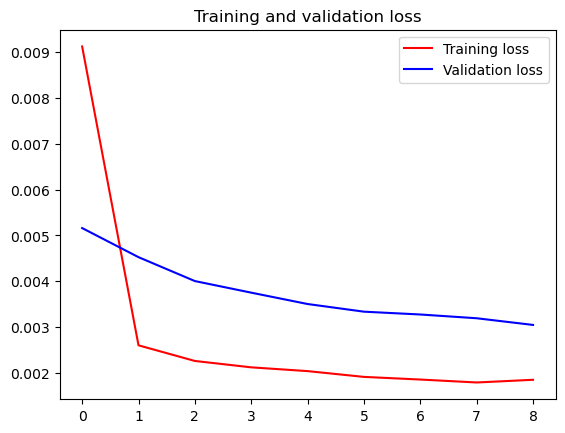

<Figure size 640x480 with 0 Axes>

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [54]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

33/33 [==============================] - 0s 6ms/step


((2496, 1), (1053, 1))

In [55]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [56]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  9.012398734771196
Train data MSE:  81.22333095450546
Train data MAE:  6.202243474477377
-------------------------------------------------------------------------------------
Test data RMSE:  12.50900793439855
Test data MSE:  156.47527950284586
Test data MAE:  8.710512603477195


In [57]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8826705651952763
Test data explained variance regression score: 0.7894917291366986


In [58]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8825773220818781
Test data R2 score: 0.7893116801182093


In [59]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.03340224915307105
Test data MGD:  0.04238371282347516
----------------------------------------------------------------------
Train data MPD:  1.4262643918808517
Test data MPD:  2.301330745819853


In [60]:
import seaborn as sns

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 6))

# names = cycle(['Original close price', 'Train predicted close price', 'Test predicted close price'])
# colors = cycle(['blue', 'orange', 'green'])

# for col in ['original_close', 'train_predicted_close', 'test_predicted_close']:
#     plt.plot(plotdf['date'], plotdf[col], label=next(names), color=next(colors))

# plt.xlabel('Date')
# plt.ylabel('Stock price')
# plt.title('Comparison between Google Stock original close price vs Google Stock predicted close price')
# plt.xticks(rotation=45)
# plt.legend()

# plt.tight_layout()
# plt.show()


Train predicted data:  (3611, 1)
Test predicted data:  (3611, 1)


In [61]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30    # Prediction for next 30 days

while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [62]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60]


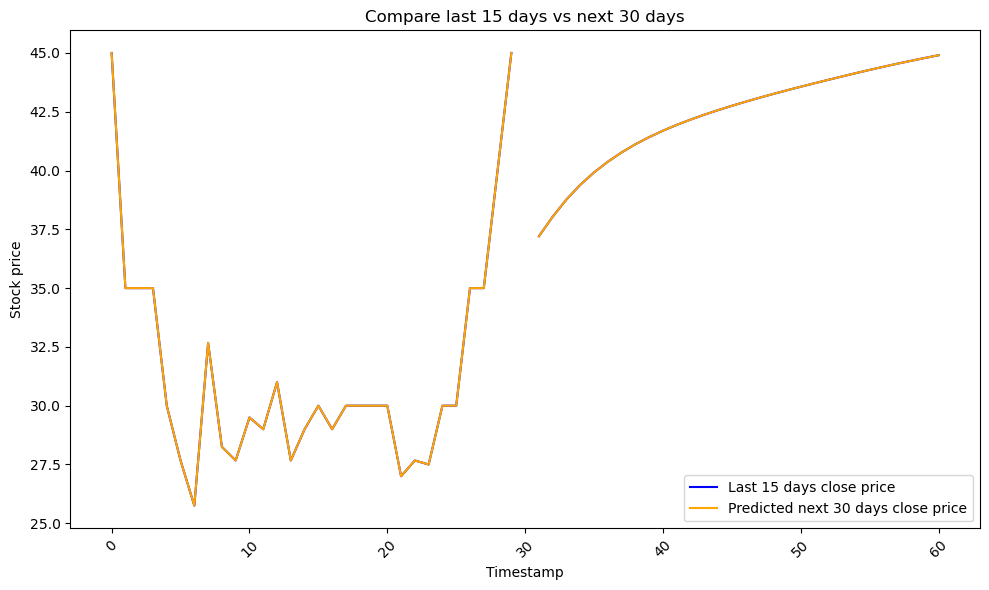

In [63]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])


# Assuming you have new_pred_plot DataFrame with necessary columns

plt.figure(figsize=(10, 6))

names = cycle(['Last 15 days close price', 'Predicted next 30 days close price'])
colors = cycle(['blue', 'orange'])

for col in ['last_original_days_value', 'next_predicted_days_value']:
    plt.plot(new_pred_plot.index, new_pred_plot[col], label=next(names), color=next(colors))

plt.xlabel('Timestamp')
plt.ylabel('Stock price')
plt.title('Compare last 15 days vs next 30 days')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


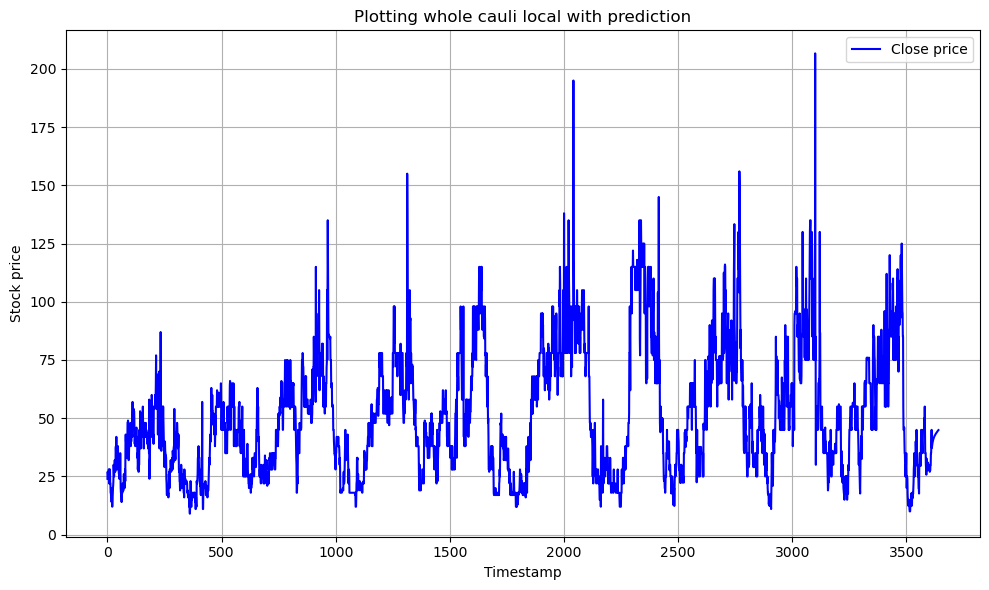

In [64]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])


# Assuming you have lstmdf list of stock prices

plt.figure(figsize=(10, 6))

names = cycle(['Close price'])
colors = cycle(['blue'])

plt.plot(lstmdf, label=next(names), color=next(colors))

plt.xlabel('Timestamp')
plt.ylabel('Stock price')
plt.title('Plotting whole cauli local with prediction')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


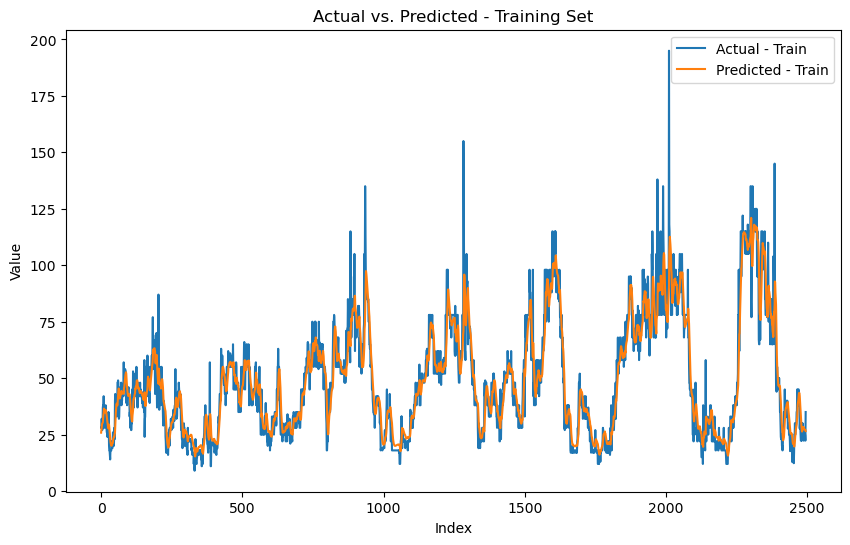

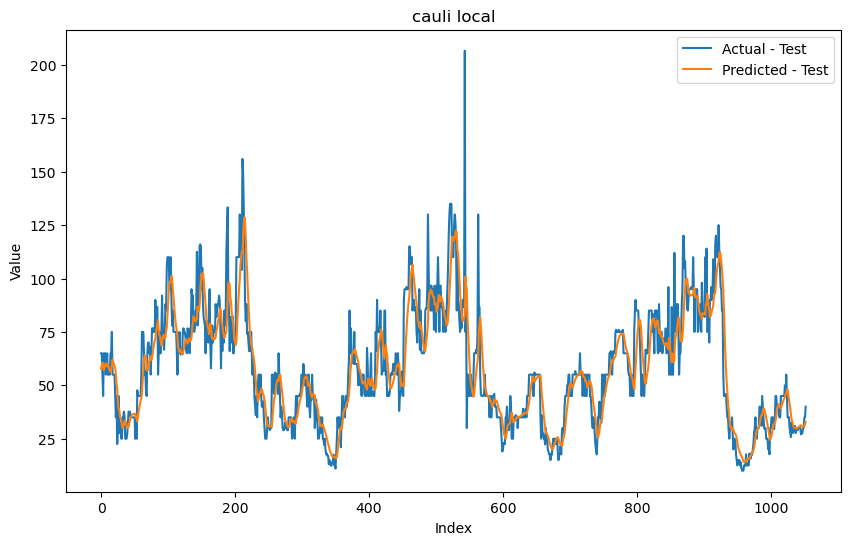

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(original_ytrain, label='Actual - Train')
plt.plot(train_predict, label='Predicted - Train')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted - Training Set')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(original_ytest, label='Actual - Test')
plt.plot(test_predict, label='Predicted - Test')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('cauli local')
plt.legend()
plt.show()


In [66]:
print(next_predicted_days_value[:30])
print(len(next_predicted_days_value))


[45.0, 35.0, 35.0, 35.0, 30.0, 27.670000000000005, 25.750000000000004, 32.67, 28.25, 27.670000000000005, 29.5, 28.999999999999996, 31.0, 27.670000000000005, 28.999999999999996, 30.0, 28.999999999999996, 30.0, 30.0, 30.0, 30.0, 27.000000000000004, 27.670000000000005, 27.5, 30.0, 30.0, 35.0, 35.0, 40.0, 45.0]
61


In [67]:
predictedprices=next_predicted_days_value[:30]

In [68]:
print(predictedprices)

[45.0, 35.0, 35.0, 35.0, 30.0, 27.670000000000005, 25.750000000000004, 32.67, 28.25, 27.670000000000005, 29.5, 28.999999999999996, 31.0, 27.670000000000005, 28.999999999999996, 30.0, 28.999999999999996, 30.0, 30.0, 30.0, 30.0, 27.000000000000004, 27.670000000000005, 27.5, 30.0, 30.0, 35.0, 35.0, 40.0, 45.0]
